# SHAPELY

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import KFold, cross_val_score

In [18]:
df = pd.read_csv(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\data\processed\train.csv')
df.shape

(97420, 12)

In [ ]:
df = df[['carrier', 'Trip_Type', 'Airport_Route', 'stop',
       'round_trip_duration', 'Days_to_Fly', 'from_hour',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price']]

In [ ]:
# df['flight_duration_value'] = round(df['flight_duration_value'],0)
# df

,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price
0,American,Rounds Trip,LAX - JFK,Nonstop,13,64,08:00,6.0,Not_Holiday,1,528.0
1,JetBlue,Rounds Trip,LAX - JFK,Nonstop,32,82,16:15,5.0,Not_Holiday,4,472.0
2,United,Rounds Trip,LAX - EWR,Nonstop,26,24,23:30,5.0,Not_Holiday,6,481.0
3,United,Rounds Trip,EWR - LAX,Nonstop,64,60,06:15,6.0,Not_Holiday,1,481.0
4,JetBlue,One Way,JFK - LAX,Nonstop,0,59,07:45,6.0,Not_Holiday,3,199.0
...,...,...,...,...,...,...,...,...,...,...,...
97415,JetBlue,One Way,EWR - LAX,Nonstop,0,79,08:15,6.0,Not_Holiday,1,259.0
97416,JetBlue,Rounds Trip,LAX - JFK,Nonstop,75,76,20:45,5.0,Not_Holiday,7,629.0
97417,United,Rounds Trip,EWR - LAX,Nonstop,4,31,10:00,6.0,Not_Holiday,3,347.0
97418,American,Rounds Trip,JFK - LAX,Nonstop,29,53,21:00,6.0,Not_Holiday,7,370.0


In [ ]:
# # Function to convert time in HH:MM format to hours
# def convert_to_hours(time_str):
#     hours, minutes = map(int, time_str.split(':'))
#     return hours + minutes / 60

# # Apply the function to the column
# df['from_hour'] = df['from_hour'].apply(convert_to_hours)
# df['from_hour'] = round(df['from_hour'],0)
# df

,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price
0,American,Rounds Trip,LAX - JFK,Nonstop,13,64,8.0,6.0,Not_Holiday,1,528.0
1,JetBlue,Rounds Trip,LAX - JFK,Nonstop,32,82,16.0,5.0,Not_Holiday,4,472.0
2,United,Rounds Trip,LAX - EWR,Nonstop,26,24,24.0,5.0,Not_Holiday,6,481.0
3,United,Rounds Trip,EWR - LAX,Nonstop,64,60,6.0,6.0,Not_Holiday,1,481.0
4,JetBlue,One Way,JFK - LAX,Nonstop,0,59,8.0,6.0,Not_Holiday,3,199.0
...,...,...,...,...,...,...,...,...,...,...,...
97415,JetBlue,One Way,EWR - LAX,Nonstop,0,79,8.0,6.0,Not_Holiday,1,259.0
97416,JetBlue,Rounds Trip,LAX - JFK,Nonstop,75,76,21.0,5.0,Not_Holiday,7,629.0
97417,United,Rounds Trip,EWR - LAX,Nonstop,4,31,10.0,6.0,Not_Holiday,3,347.0
97418,American,Rounds Trip,JFK - LAX,Nonstop,29,53,21.0,6.0,Not_Holiday,7,370.0


In [ ]:
df.columns

Index(['carrier', 'Trip_Type', 'Airport_Route', 'stop', 'round_trip_duration',
       'Days_to_Fly', 'from_hour', 'flight_duration_value', 'Holiday',
       'Fly_WeekDay', 'price'],
      dtype='object')

In [ ]:
X = df[['carrier', 'Trip_Type', 'Airport_Route', 'stop', 'round_trip_duration',
       'Days_to_Fly', 'from_hour', 'flight_duration_value', 'Holiday',
       'Fly_WeekDay']]

In [ ]:
# Columns to encode and scale
columns_to_encode = ['carrier', 'Trip_Type', 'Airport_Route', 'stop', 'Holiday', 'from_hour', 'Fly_WeekDay']
columns_to_scale = ['round_trip_duration', 'Days_to_Fly', 'flight_duration_value']

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(), columns_to_encode)
    ],
    remainder='passthrough'
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(X)

# Extract transformed column names for categorical columns
cat_transformer = preprocessor.named_transformers_['cat']
feature_names = list(cat_transformer.get_feature_names_out(input_features=columns_to_encode))

# Combine with numerical column names
transformed_columns = columns_to_scale + feature_names

# Ensure transformed_data is a DataFrame (for demonstration)
transformed_df = pd.DataFrame(transformed_data.toarray(), columns=transformed_columns)

In [ ]:
# columns_to_encode = ['carrier','Trip_Type','Airport_Route','stop','Holiday','from_hour','Fly_WeekDay']
# columns_to_scale = ['round_trip_duration', 'Days_to_Fly', 'flight_duration_value']

In [ ]:
# new_df = pd.get_dummies(df,columns=['carrier','Trip_Type','Airport_Route','stop','from_hour','Holiday','Fly_WeekDay'],drop_first=True)
# new_df

,round_trip_duration,Days_to_Fly,flight_duration_value,price,carrier_American,carrier_Delta,carrier_JetBlue,carrier_Spirit,carrier_United,Trip_Type_Rounds Trip,...,from_hour_22.0,from_hour_23.0,from_hour_24.0,Holiday_Not_Holiday,Fly_WeekDay_2,Fly_WeekDay_3,Fly_WeekDay_4,Fly_WeekDay_5,Fly_WeekDay_6,Fly_WeekDay_7
0,13,64,6.0,528.0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,32,82,5.0,472.0,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,26,24,5.0,481.0,False,False,False,False,True,True,...,False,False,True,True,False,False,False,False,True,False
3,64,60,6.0,481.0,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,0,59,6.0,199.0,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97415,0,79,6.0,259.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
97416,75,76,5.0,629.0,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
97417,4,31,6.0,347.0,False,False,False,False,True,True,...,False,False,False,True,False,True,False,False,False,False
97418,29,53,6.0,370.0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform only the selected columns
# new_df[columns_to_scale] = scaler.fit_transform(new_df[['round_trip_duration', 'Days_to_Fly', 'flight_duration_value']])

# # The resulting DataFrame
# new_df

,round_trip_duration,Days_to_Fly,flight_duration_value,price,carrier_American,carrier_Delta,carrier_JetBlue,carrier_Spirit,carrier_United,Trip_Type_Rounds Trip,...,from_hour_22.0,from_hour_23.0,from_hour_24.0,Holiday_Not_Holiday,Fly_WeekDay_2,Fly_WeekDay_3,Fly_WeekDay_4,Fly_WeekDay_5,Fly_WeekDay_6,Fly_WeekDay_7
0,-0.407552,0.689872,-0.056728,528.0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,0.231587,1.401571,-1.102023,472.0,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0.029754,-0.891684,-1.102023,481.0,False,False,False,False,True,True,...,False,False,True,True,False,False,False,False,True,False
3,1.308032,0.531716,-0.056728,481.0,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,-0.844857,0.492177,-0.056728,199.0,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97415,-0.844857,1.282955,-0.056728,259.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
97416,1.678059,1.164338,-1.102023,629.0,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
97417,-0.710302,-0.614912,-0.056728,347.0,False,False,False,False,True,True,...,False,False,False,True,False,True,False,False,False,False
97418,0.130671,0.254944,-0.056728,370.0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# X = new_df.drop(columns=['price'])
y = df['price']

In [ ]:
y_log = np.log(y)

In [ ]:
import shap
import numpy as np

# Take a random sample of the data
sample_size = 10  # Adjust based on your computational resources
sample_indices = np.random.choice(transformed_df.shape[0], sample_size, replace=False)
X_sample = transformed_df.iloc[sample_indices]

# Fit the model on the entire dataset
rf = RandomForestRegressor()
rf.fit(transformed_df, y_log)

# Create SHAP explainer and compute SHAP values for the sample
explainer = shap.TreeExplainer(rf)

shap_values = explainer(X_sample)

# Summary plot for the sample
# shap.summary_plot(shap_values, X_sample)

shap_values[0]


.values =
array([ 1.07918384e-01,  1.07557295e-02,  2.92270819e-02,  1.84505034e-04,
        2.04549697e-03,  2.70372597e-02,  3.13332368e-02,  8.88584981e-03,
       -5.04304696e-04,  5.12326281e-02,  1.77757362e-01,  5.27194457e-02,
        7.45347866e-03,  3.71329459e-02,  3.82203252e-02,  1.33827597e-04,
        2.13071935e-04, -6.65615933e-06,  1.53680121e-06,  3.64054645e-02,
       -1.96753095e-03, -1.60145988e-03,  8.70261590e-04, -6.02227388e-06,
       -1.73457474e-07, -1.34040437e-05,  7.82598053e-05, -5.80710769e-07,
       -3.65952705e-07, -1.11143730e-05,  2.67218191e-05,  8.63053378e-06,
        7.87597796e-05, -1.99380312e-06,  1.38911911e-03, -3.73683754e-04,
        1.45649896e-04,  2.11754747e-04,  7.73017763e-04, -2.18883257e-04,
        3.13607473e-04,  2.40817121e-05, -6.08533882e-04, -1.65724806e-04,
       -5.11508604e-04,  1.21384523e-04, -9.38224225e-04, -7.03966262e-04,
       -3.50560012e-04, -1.55139058e-04, -5.71737854e-04, -3.71544355e-04,
       -4.71333

In [ ]:
# Exponentiate the base value and SHAP values
base_value_exp = np.exp(shap_values.base_values)
shap_values_exp = shap_values.values * np.exp(shap_values.base_values[:, np.newaxis])


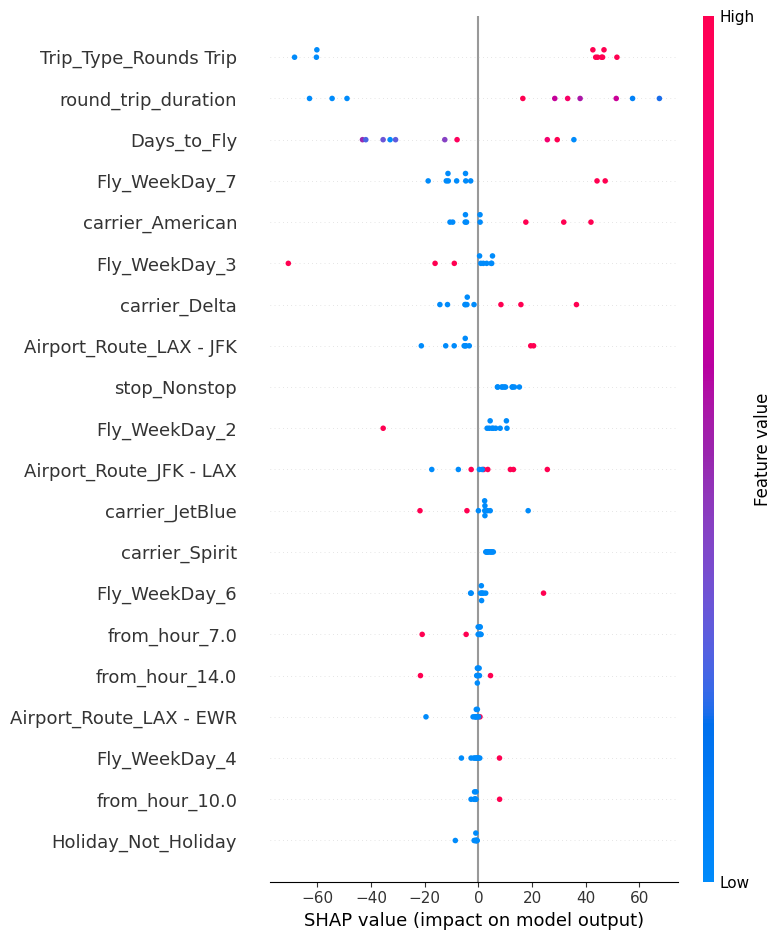

In [ ]:
# Create a new SHAP Explanation object with transformed values
transformed_shap_values = shap.Explanation(
    values=shap_values_exp,
    base_values=base_value_exp,
    data=X_sample.values,
    feature_names=X_sample.columns
)

# Summary plot for the sample with transformed SHAP values
shap.summary_plot(transformed_shap_values, X_sample)

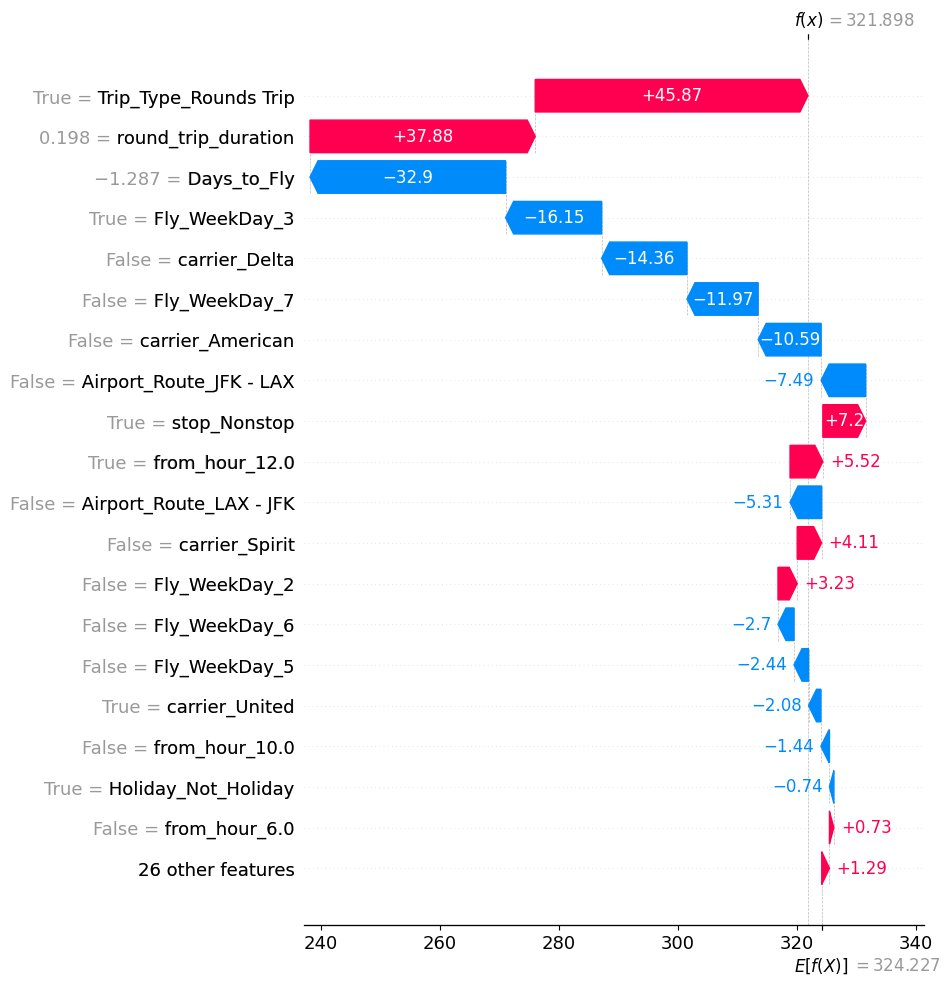

In [ ]:
# Select the index of the sample you want to visualize
index = 0  # Example: First sample in the sample set

# Extract SHAP values for the selected sample
shap_values_array = shap_values_exp[index]
base_value = base_value_exp[index]
feature_values = X_sample.iloc[index].values

# Create a SHAP Explanation object for the selected sample
explanation = shap.Explanation(
    values=shap_values_array,
    base_values=base_value,
    data=feature_values,
    feature_names=X_sample.columns
)

# Create a waterfall plot for the selected sample
shap.plots.waterfall(explanation, max_display=20)


# waterfall logic

In [ ]:
import pickle as pk

In [ ]:
file_path = r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\pickle_files\flight_pipeline.pkl'
with open(file_path, 'rb') as file:
    pipeline = pk.load(file)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['round_trip_duration',
                                                   'Days_to_Fly',
                                                   'flight_duration_value']),
                                                 ('cat', OneHotEncoder(),
                                                  ['carrier', 'Trip_Type',
                                                   'Airport_Route', 'stop',
                                                   'Holiday', 'from_hour',
                                                   'Fly_WeekDay'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
import shap

# Fit SHAP TreeExplainer
explainer = shap.TreeExplainer(pipeline.named_steps['regressor'])

In [ ]:
file_path = r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\pickle_files\one_df.pkl'
with open(file_path, 'rb') as file:
    one_df = pk.load(file)
one_df

,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,flight_duration_value,Holiday,Fly_WeekDay,from_hour
0,American,One Way,LAX - EWR,Nonstop,0,89,8.0,Not_Holiday,4,21:15


In [ ]:
new_data_point_transformed = pipeline.named_steps['preprocessor'].transform(one_df)
new_data_point_dense = new_data_point_transformed.toarray()
new_data_point_dense


array([[-0.84485711,  1.67834367,  2.05731012,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [ ]:
preprocessor = pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__round_trip_duration', 'num__Days_to_Fly',
       'num__flight_duration_value', 'cat__carrier_Alaska',
       'cat__carrier_American', 'cat__carrier_Delta',
       'cat__carrier_JetBlue', 'cat__carrier_Spirit',
       'cat__carrier_United', 'cat__Trip_Type_One Way',
       'cat__Trip_Type_Rounds Trip', 'cat__Airport_Route_EWR - LAX',
       'cat__Airport_Route_JFK - LAX', 'cat__Airport_Route_LAX - EWR',
       'cat__Airport_Route_LAX - JFK', 'cat__Airport_Route_LAX - LGA',
       'cat__Airport_Route_LGA - LAX', 'cat__stop_1 stop',
       'cat__stop_2 stops', 'cat__stop_Nonstop', 'cat__Holiday_Holiday',
       'cat__Holiday_Not_Holiday', 'cat__from_hour_00:00',
       'cat__from_hour_00:15', 'cat__from_hour_00:30',
       'cat__from_hour_00:45', 'cat__from_hour_01:00',
       'cat__from_hour_01:15', 'cat__from_hour_01:30',
       'cat__from_hour_01:45', 'cat__from_hour_05:00',
       'cat__from_hour_05:15', 'cat__from_hour_05:30',
       'cat__from_hour_05:45', 'cat__from_ho

In [ ]:
import pandas as pd
new_data_point_df = pd.DataFrame(new_data_point_dense, columns=feature_names)
new_data_point_df

,num__round_trip_duration,num__Days_to_Fly,num__flight_duration_value,cat__carrier_Alaska,cat__carrier_American,cat__carrier_Delta,cat__carrier_JetBlue,cat__carrier_Spirit,cat__carrier_United,cat__Trip_Type_One Way,...,cat__from_hour_23:15,cat__from_hour_23:30,cat__from_hour_23:45,cat__Fly_WeekDay_1,cat__Fly_WeekDay_2,cat__Fly_WeekDay_3,cat__Fly_WeekDay_4,cat__Fly_WeekDay_5,cat__Fly_WeekDay_6,cat__Fly_WeekDay_7
0,-0.844857,1.678344,2.05731,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Generate SHAP values
shap_values = explainer(new_data_point_df)
shap_values[0]

.values =
array([-8.10733126e-02,  1.67105180e-01, -2.04955843e-02,  3.51980354e-03,
        2.01690072e-02,  7.00781535e-04,  1.29011776e-02,  1.47338653e-02,
       -3.62123209e-03,  0.00000000e+00, -2.53020430e-01,  1.88443720e-02,
       -1.63273879e-03, -1.27504405e-02, -1.06559296e-02, -9.53411022e-05,
        2.27747037e-04,  3.05713511e-05, -1.21037808e-06,  4.36913095e-02,
        1.10604992e-03,  7.69125091e-04,  1.56531861e-04, -6.37505193e-06,
        5.33001337e-07, -7.56878607e-06, -3.80509191e-06, -4.33553742e-07,
       -2.53978106e-07, -3.01520046e-05,  6.40663335e-05,  1.15321705e-05,
        6.23987635e-05, -2.23511477e-05,  9.53722750e-04,  6.17514108e-05,
        7.31811816e-05,  4.65424018e-04,  4.87322996e-05, -1.93884826e-04,
        4.10844725e-04, -3.98281116e-05, -1.03939159e-03, -1.90936673e-04,
       -3.31107814e-04,  1.24439479e-04, -2.23809733e-05, -2.54948781e-04,
        6.68562435e-04, -1.63278807e-04, -5.99599863e-04,  2.04173673e-04,
       -6.26033

In [ ]:
import numpy as np
# Exponentiate the base value and SHAP values
base_value_exp = np.exp(shap_values.base_values)
shap_values_exp = shap_values.values * np.exp(shap_values.base_values[:, np.newaxis])

In [ ]:
base_value_exp

array([325.35569149])

In [ ]:
shap_values_exp

array([[-2.63776637e+01,  5.43686215e+01, -6.66835500e+00,
         1.14518811e+00,  6.56210128e+00,  2.28003261e-01,
         4.19747154e+00,  4.79374692e+00, -1.17818847e+00,
         0.00000000e+00, -8.23216370e+01,  6.13112369e+00,
        -5.31220858e-01, -4.14842839e+00, -3.46696734e+00,
        -3.10197702e-02,  7.40987946e-02,  9.94656307e-03,
        -3.93803398e-04,  1.42152162e+01,  3.59859637e-01,
         2.50239226e-01,  5.09285317e-02, -2.07415943e-03,
         1.73415019e-04, -2.46254763e-03, -1.23800831e-03,
        -1.41059178e-04, -8.26332223e-05, -9.81012629e-03,
         2.08443462e-02,  3.75205730e-03,  2.03017928e-02,
        -7.27207313e-03,  3.10299125e-01,  2.00911729e-02,
         2.38099140e-02,  1.51428353e-01,  1.58553310e-02,
        -6.30815315e-02,  1.33670670e-01, -1.29583028e-02,
        -3.38171970e-01, -6.21223332e-02, -1.07727812e-01,
         4.04870927e-02, -7.28177704e-03, -8.29490370e-02,
         2.17520593e-01, -5.31236892e-02, -1.95083228e-0

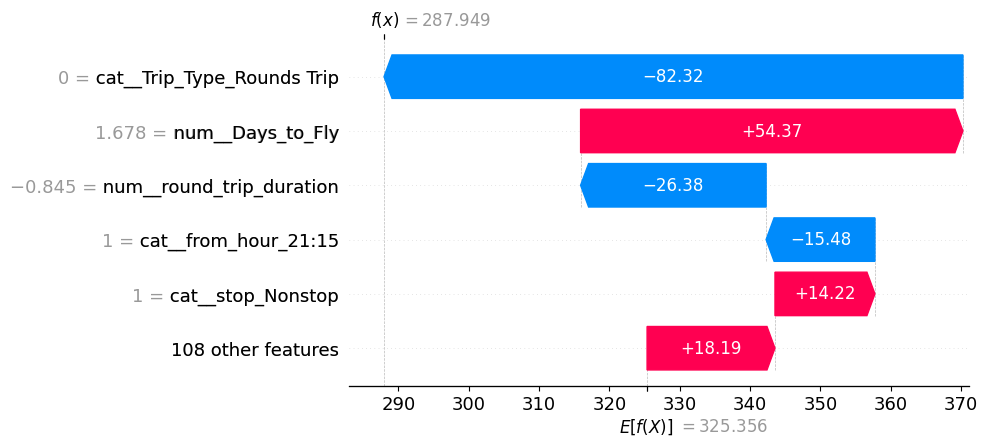

In [ ]:
import matplotlib.pyplot as plt
# Select the index of the sample you want to visualize
index = 0  # Example: First sample in the sample set

# Extract SHAP values for the selected sample
shap_values_array = shap_values_exp[index]
base_value = base_value_exp[index]
feature_values = new_data_point_df.iloc[index].values

# Create a SHAP Explanation object for the selected sample
explanation = shap.Explanation(
    values=shap_values_array,
    base_values=base_value,
    data=feature_values,
    feature_names=new_data_point_df.columns
)

# Create a waterfall plot for the selected sample
shap.plots.waterfall(explanation, max_display=6)
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\shapely_plots\explain_waterfall.png', bbox_inches='tight')
plt.close()

In [ ]:
shap_values.base

array([-8.10733126e-02,  1.67105180e-01, -2.04955843e-02,  3.51980354e-03,
        2.01690072e-02,  7.00781535e-04,  1.29011776e-02,  1.47338653e-02,
       -3.62123209e-03,  0.00000000e+00, -2.53020430e-01,  1.88443720e-02,
       -1.63273879e-03, -1.27504405e-02, -1.06559296e-02, -9.53411022e-05,
        2.27747037e-04,  3.05713511e-05, -1.21037808e-06,  4.36913095e-02,
        1.10604992e-03,  7.69125091e-04,  1.56531861e-04, -6.37505193e-06,
        5.33001337e-07, -7.56878607e-06, -3.80509191e-06, -4.33553742e-07,
       -2.53978106e-07, -3.01520046e-05,  6.40663335e-05,  1.15321705e-05,
        6.23987635e-05, -2.23511477e-05,  9.53722750e-04,  6.17514108e-05,
        7.31811816e-05,  4.65424018e-04,  4.87322996e-05, -1.93884826e-04,
        4.10844725e-04, -3.98281116e-05, -1.03939159e-03, -1.90936673e-04,
       -3.31107814e-04,  1.24439479e-04, -2.23809733e-05, -2.54948781e-04,
        6.68562435e-04, -1.63278807e-04, -5.99599863e-04,  2.04173673e-04,
       -6.26033941e-04, -